<a href="https://colab.research.google.com/github/MientusJJ/Python-Exercises/blob/main/Kopia_notatnika_Z10_B_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()

<ipython-input-5-b8b4c014ef00>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)
<ipython-input-5-b8b4c014ef00>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [ ]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
747/747 [==============================] - 4s 4ms/step - loss: 0.4807 - accuracy: 0.7706 - val_loss: 0.3937 - val_accuracy: 0.8088
Epoch 2/100
747/747 [==============================] - 3s 4ms/step - loss: 0.3880 - accuracy: 0.8070 - val_loss: 0.3987 - val_accuracy: 0.7891
Epoch 3/100
747/747 [==============================] - 3s 3ms/step - loss: 0.3804 - accuracy: 0.8091 - val_loss: 0.3766 - val_accuracy: 0.8169
Epoch 4/100
747/747 [==============================] - 3s 4ms/step - loss: 0.3757 - accuracy: 0.8128 - val_loss: 0.3686 - val_accuracy: 0.8165
Epoch 5/100
747/747 [==============================] - 3s 5ms/step - loss: 0.3709 - accuracy: 0.8191 - val_loss: 0.3613 - val_accuracy: 0.8266
Epoch 6/100
747/747 [==============================] - 3s 4ms/step - loss: 0.3589 - accuracy: 0.8319 - val_loss: 0.3583 - val_accuracy: 0.8257
Epoch 7/100
747/747 [==============================] - 3s 4ms/step - loss: 0.3567 - accuracy: 0.8275 - val_loss: 0.3625 - val_accuracy: 0.8302

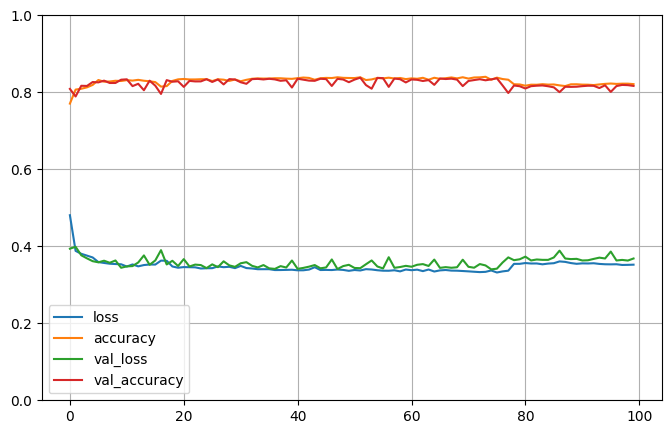

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.4930 - accuracy: 0.7961


[0.4929542541503906, 0.7961487174034119]

In [ ]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred = np.argmax(model.predict(X_test), axis=-1) )

471/471 [==============================] - 1s 1ms/step


0.7543160690571049

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
history2 = model.fit(X_train_scaled , y_train, validation_data= (X_test_scaled , y_test), batch_size=32, epochs=100)

Epoch 1/100
747/747 [==============================] - 3s 4ms/step - loss: 0.3239 - accuracy: 0.8478 - val_loss: 0.3312 - val_accuracy: 0.8445
Epoch 2/100
747/747 [==============================] - 2s 3ms/step - loss: 0.3209 - accuracy: 0.8493 - val_loss: 0.3286 - val_accuracy: 0.8451
Epoch 3/100
747/747 [==============================] - 3s 4ms/step - loss: 0.3181 - accuracy: 0.8499 - val_loss: 0.3292 - val_accuracy: 0.8449
Epoch 4/100
747/747 [==============================] - 3s 4ms/step - loss: 0.3162 - accuracy: 0.8509 - val_loss: 0.3274 - val_accuracy: 0.8468
Epoch 5/100
747/747 [==============================] - 4s 5ms/step - loss: 0.3142 - accuracy: 0.8528 - val_loss: 0.3275 - val_accuracy: 0.8461
Epoch 6/100
747/747 [==============================] - 2s 3ms/step - loss: 0.3123 - accuracy: 0.8521 - val_loss: 0.3273 - val_accuracy: 0.8461
Epoch 7/100
747/747 [==============================] - 2s 3ms/step - loss: 0.3104 - accuracy: 0.8539 - val_loss: 0.3269 - val_accuracy: 0.8473

# Zad. 
Stwórz wykres porównujący metody. 

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()